# 3. Explore a netCDF dataset

In [117]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


%matplotlib inline




In [118]:
ds  = xr.open_dataset("air.sig995.2012.nc", engine="netcdf4")

C:\Users\WANG\anaconda3\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


## 3.1 Plot a time series of a certain variable with monthly seasonal cycle removed.

In [119]:
group_data = ds.air.groupby('time.month')
air_anom = group_data - group_data.mean(dim='time')
line_air_anom = air_anom.mean(dim=('lat','lon'))

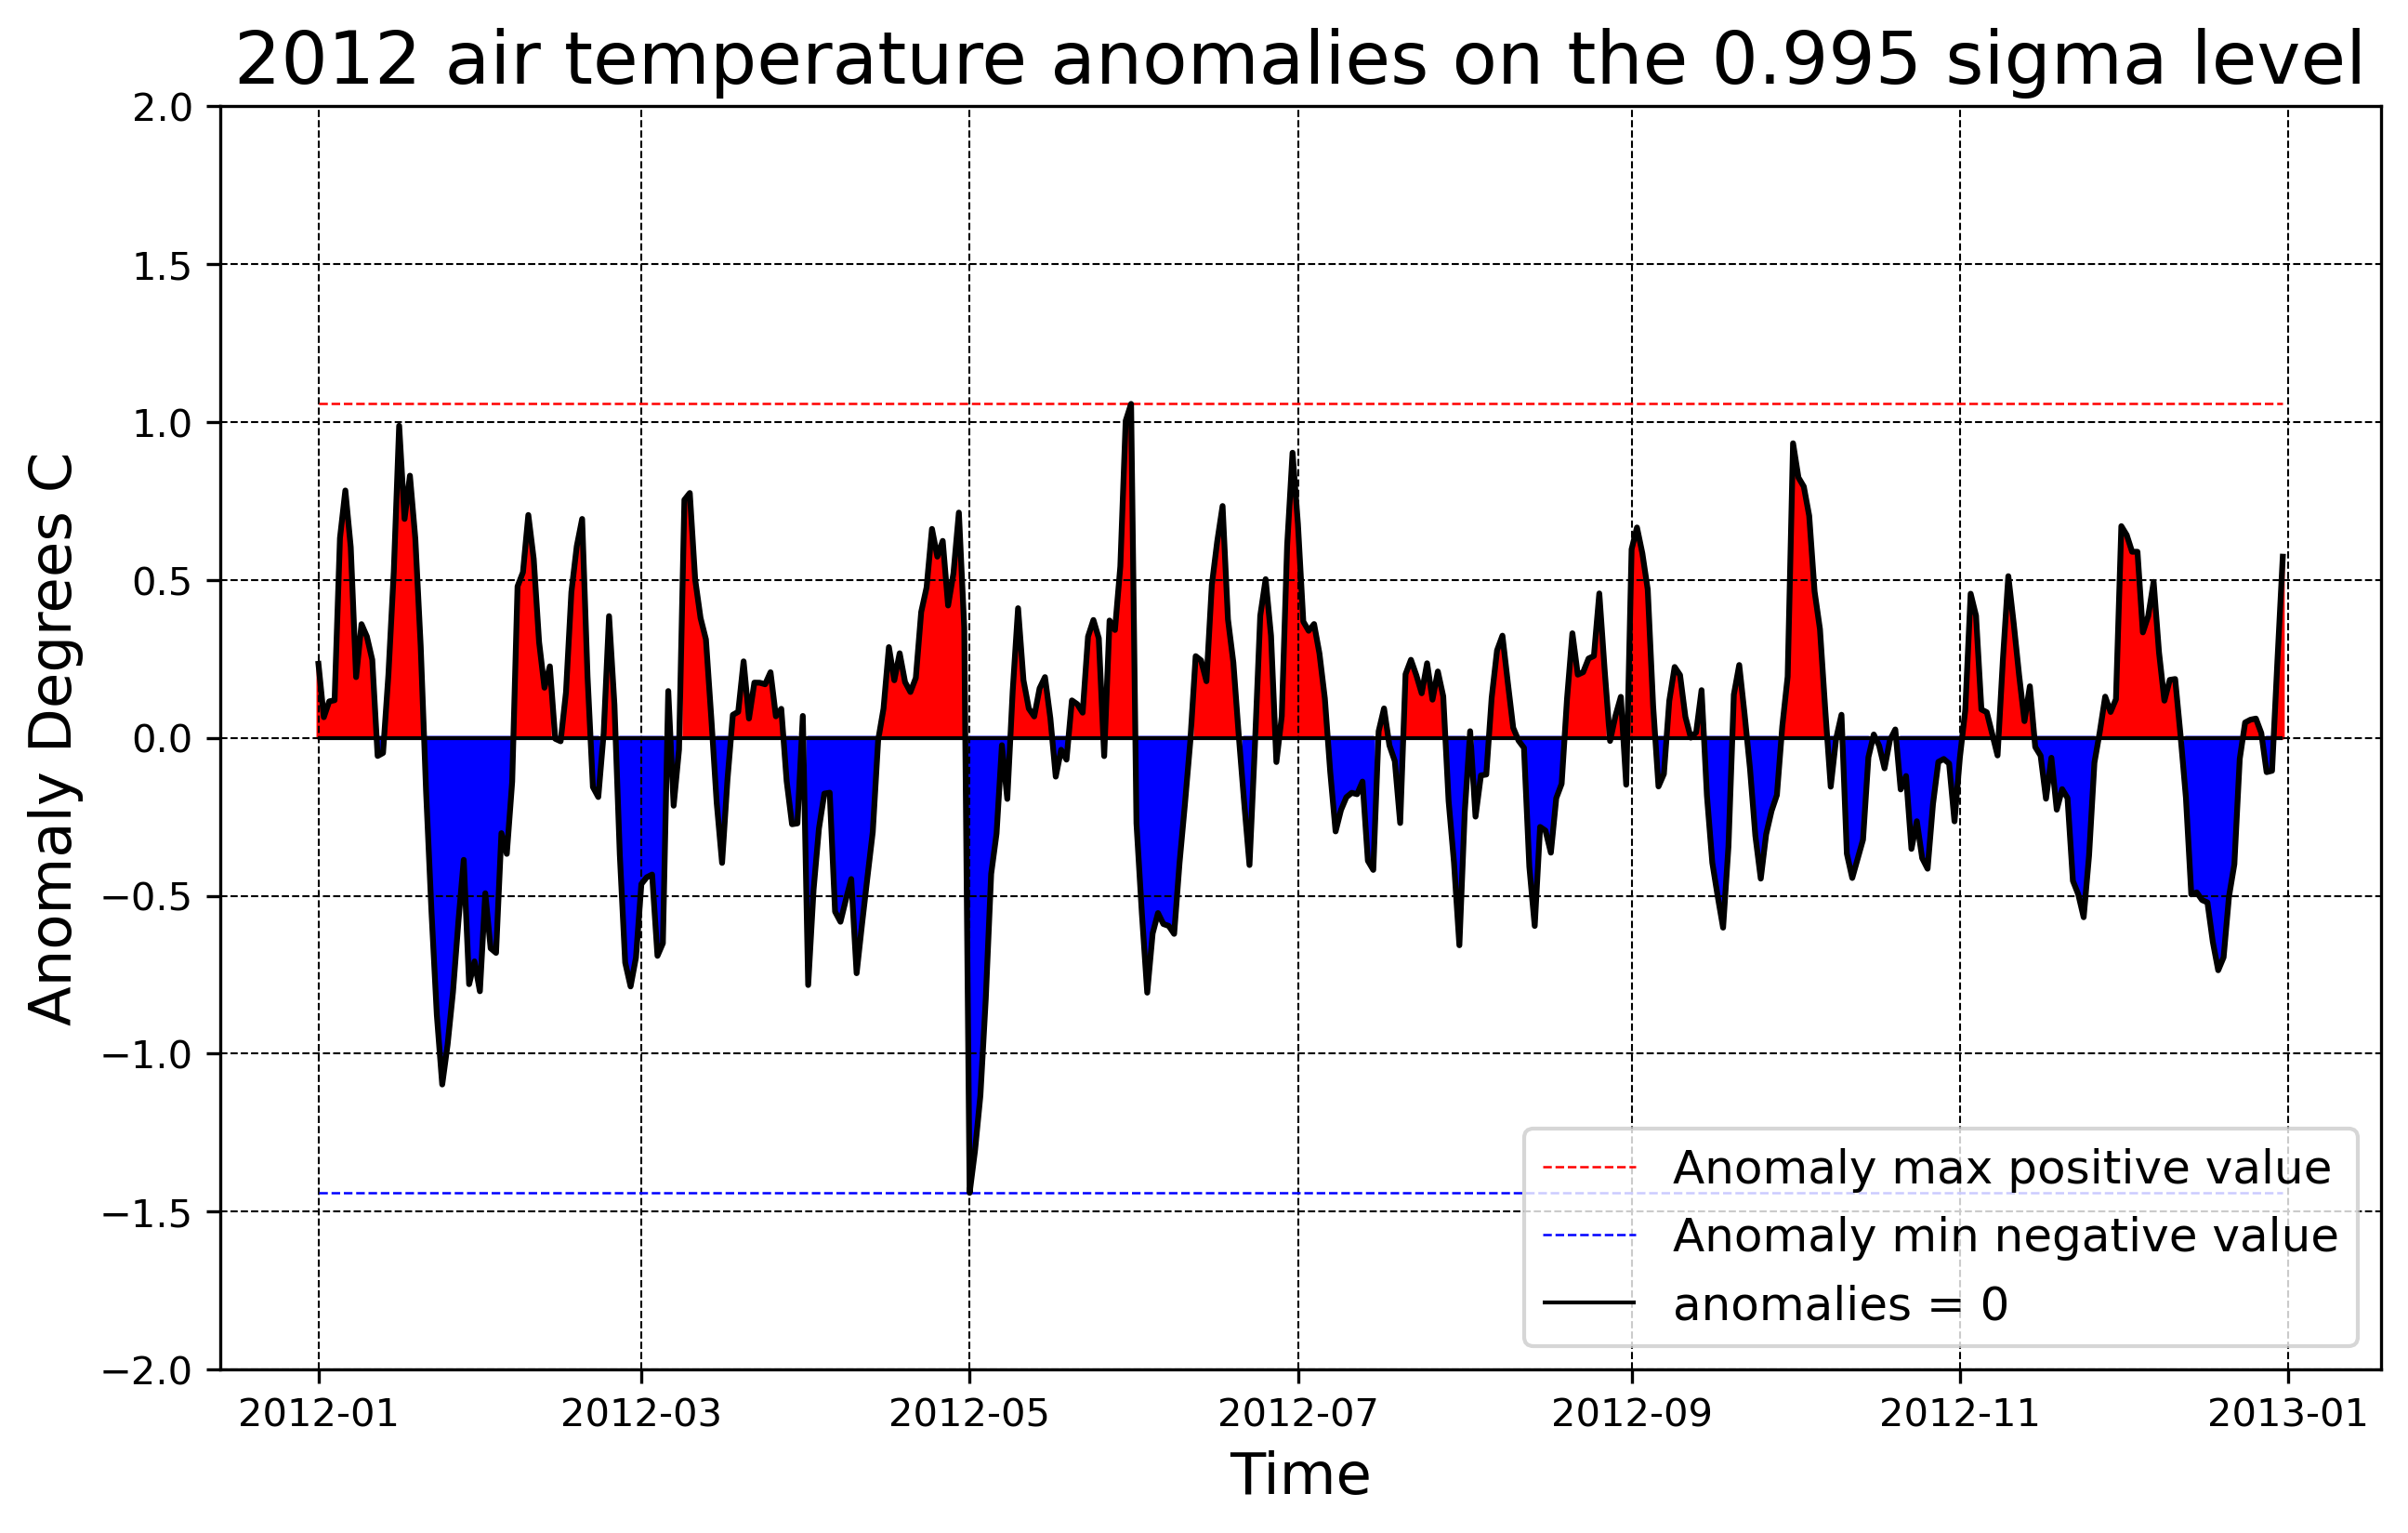

In [120]:
time = pd.date_range(start='2012-01-01',periods=366,freq='d')
fig,ax = plt.subplots(1,1,figsize = [10,6],dpi=300)
ax.plot(time,line_air_anom,color='k')

ax.set_ylabel('Anomaly Degrees C', color='k', fontsize=15)
ax.set_xlabel('Time', color='k', fontsize=15)
ax.set_title("2012 air temperature anomalies on the 0.995 sigma level", fontsize=19)

ax.grid(linestyle='--',linewidth=0.5,color='k')

ax.hlines(y = line_air_anom.max(),xmin=time[0],xmax=time[-1],color='r',linestyles='--',lw=0.6,label='Anomaly max positive value')
ax.hlines(y = line_air_anom.min(),xmin=time[0],xmax=time[-1],color='b',linestyles='--',lw=0.6,label='Anomaly min negative value')
ax.hlines(y = 0,xmin=time[0],xmax=time[-1],color='k',linestyles='solid',lw=1,label='anomalies = 0')

ax.set_ylim(-2,2)
ax.legend(loc=4,fontsize=12)


ax.fill_between(time,0,line_air_anom,where=(line_air_anom>0),color='r')
ax.fill_between(time,0,line_air_anom,where=(line_air_anom<0),color='b')



## 3.2 Make at least 5 different plots using the dataset.


Text(0.5, 1.0, 'mean monthly air temperature(K)')

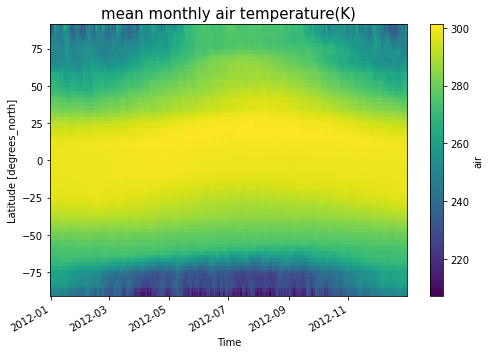

In [127]:
#1 不同纬度全球月平均空气温度
mean_monthly = ds.air.groupby('time.month').mean(dim=('lon'))
mean_monthly.plot(x='time',figsize=(8,5))
plt.title('mean monthly air temperature(K)',fontsize=15)


In [128]:
#2&3 全球十二月份和一月份的平均空气温度

fig, ax1 = plt.subplots(1,1,figsize=(8,5), dpi=100)
ax1.plot(ds.air.sel(time=slice('2012-12-01', '2012-12-31')).mean(dim=('lon','lat')), color='g')

ax2 = ax1.twinx()
ax2.plot(ds.air.sel(time=slice('2012-01-01', '2012-01-31')).mean(dim=('lon','lat')), color='b')

ax1.set_xlabel('Time', color='k', fontsize=15)
ax1.set_ylabel('DEC Temperature(K)', color='g', fontsize=15)
ax2.set_ylabel('JAN Temperature(K)', color='b', fontsize=15)


ax1.tick_params(axis='y', rotation=0, labelcolor='g')
ax2.tick_params(axis='y', rotation=0, labelcolor='b')
ax2.set_title("DEC & JAN mean air temperature(K)", fontsize=20)



Text(0.5, 1.0, 'DEC & JAN mean air temperature(K)')

Text(0.5, 1.0, 'Average temperatures at different latitudes in 2012(degree centigrade)')

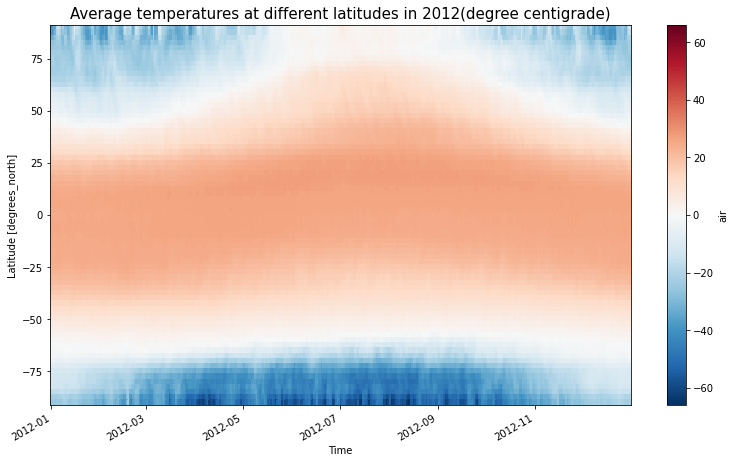

In [124]:
#4 2012年不同纬度的平均温度
C_temperture= ds.air - 273.15
C_temperture.mean(dim=('lon')).plot(x='time',figsize=(13,7))
plt.title('Average temperatures at different latitudes in 2012(degree centigrade)',fontsize=15)


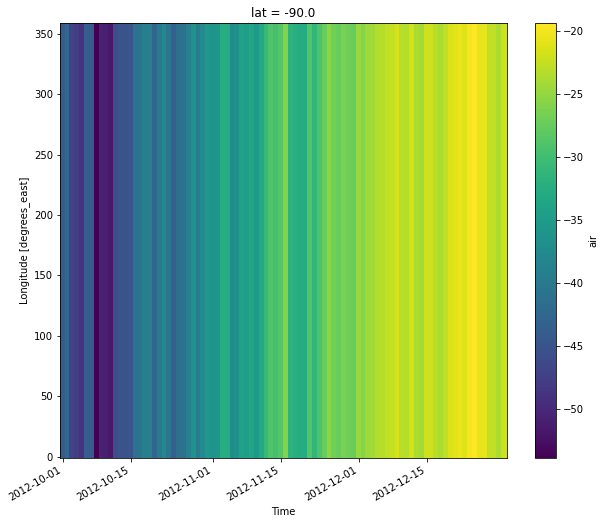

In [126]:
#5 Lat=90S时，10-12月的平均气温
da_air_Ant = ds.air.sel(lat='-90',time=slice('2012-10-01','2012-12-31'))-273.15
da_air_Ant.plot(x='time',figsize=(10,8))
